# Matplotlib en Visualisatie in python

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn import datasets
from IPython import display


### *Introductie*

Data visualisatie is een belangrijke component van de skills set van elke data scientist. Binnen python ecosystem zijn er verschillende visualisatie libraries waar uit men kan kiezen en de keuze is afhankelijk van de doelstelling. Hieronder vind je een kort overzicht.

* Statistische analyse: Seaborn, Altair, Plotnine, Bokeh, Matplotlib 
* Geografische data: Geoplot
* Grote datasets: Datashader

Matplotlib is een van de oudste data visualisatie libraries. Het begon met het idee om de functionalitieten van Matlab na te bootsen. Het eerste versie kwam uit rond 2003 en sindsdien heeft het een grote userbase gekregen. Matplotlib wordt niet enkel gebruikt om inzichten te creeren maar er zijn ook andere python libraries die gebouwd zijn op Matplotlib zoals Seaborn, SHAP, LIME en zelfs de .plot() methode van pandas daarom vind ik dat ondanks welke library je uitkiest het is handig om Matplotlib in de basis te snappen. 

Als je meer gericht ben om statistische onderzoek en iets nieuws wil uitproberen dan is het aan te raden om Altair te proberen. Mocht je meer wil weten dan verwijs ik je naar de blog van [Remco Rodenburg]().

Wat ik in deze blog wil laten zien is hoe ik gebruik maak van Matplotlib om (sub)plots te organiseren en customizen met het doel om mijn verhaal aan de man te brengen. Hiervoor wil ik ingaan op de de essentiel begripen van Matplotlib zoals `Figure`, `Axes`, `Subplots` en `Gridspec`. En als laatste wil ik kort ingaan op de hierarchie van de plot functies van Seaborn en hoe ze met Matplotlib geintegereerd zijn. Dit is handig om te weten mocht je Seaborn plot functies wil gebruiken in combinatie met Matplotlib voor statistische analyse. Waar deze blog niet over gaat is welke type grafieken(barplot, scatterplot, etc) wordt aangeboden door welke library want in de basis alle libraries bieden die mogelijkheid. 

### *Matplotlib plot hierarchie*

Matplotlib grafiek komt met een hierarchie. De hoogste punt in de hierarchie is de `Figure` object die je kan vergelijken met een fotolijst waar een of meerdere plots in kunnen komen. De plots worden `Axes` genoemd in Matplotlib jargon. Hieronder in de eerste grafiek zie je een enkel `Figure` object met een enkel `Axes` object. En bij de tweede en derde grafiek zie je een`Figure` object met meerdere `Axes` objecten. De methode [.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) van module `matplotlib.pyplot` kan gebruikt worden om een `Axes` en `Figure` object aan te maken. Beide objecten hebben hun eigen methoden die aangeroepen kunnen worden om de grafieken te customizen. Laten we dit aan de hand van een paar voorbelden proberen te begrijpen.

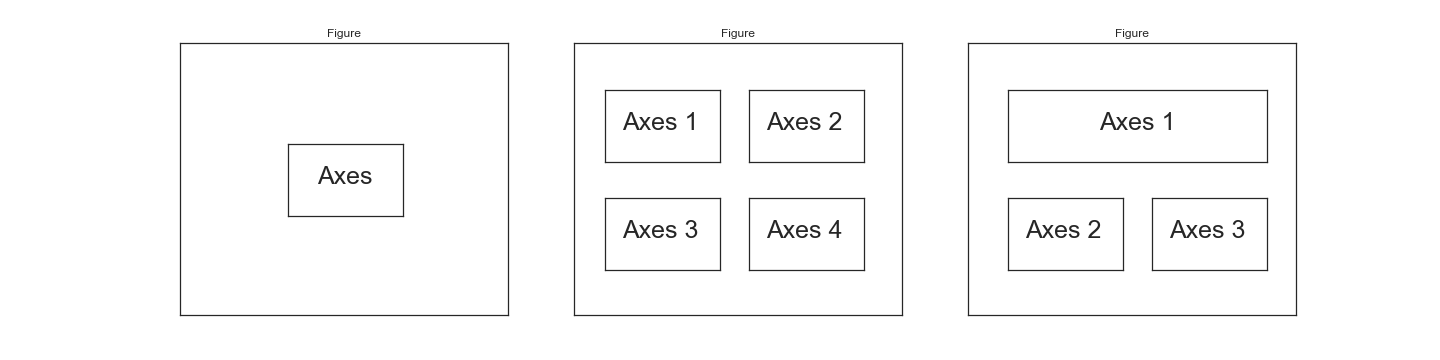

In [3]:
display.Image("matplotlib_hierarchie.png")

In [4]:
# Load data
df = datasets.fetch_california_housing(return_X_y=False, as_frame=True).frame
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
16418,2.9531,34.0,4.316239,0.880342,678.0,2.897436,37.87,-121.27,1.040
5657,5.2490,52.0,5.904255,0.992908,656.0,2.326241,33.73,-118.31,3.519
7950,4.8942,36.0,5.073955,1.003215,827.0,2.659164,33.86,-118.15,1.941
17197,2.4701,28.0,3.622263,1.062044,1092.0,1.992701,34.44,-119.76,2.909
11746,8.4882,27.0,6.945946,0.972973,315.0,2.837838,38.75,-121.16,2.766


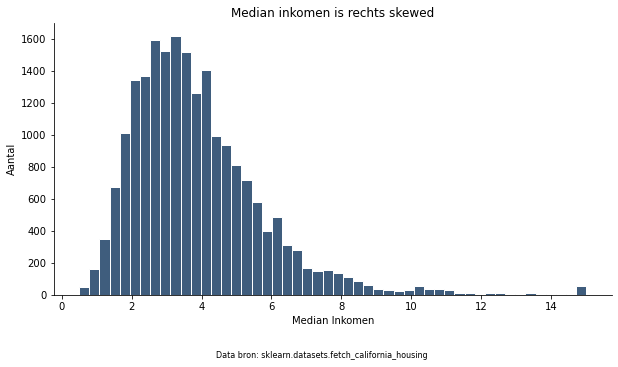

In [54]:
# Definieer grafiek ruimte
# de naam conventies voor `Figure` object is fig en voor `Axis` is ax
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,5))

# Plot
ax.hist(df["MedInc"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en (sub)plot title
ax.set(xlabel='Median Inkomen', ylabel='Aantal', title='Median inkomen is rechts skewed')

# verwijder de spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# meld altijd je databron
fig.text(0.35, -0.05, "Data bron: sklearn.datasets.fetch_california_housing", fontsize=8)
  
# Plot de grafiek
plt.show()

Hier is het denk proces:

- Stap 1: met`.subplots()` defineer ik een grafiek ruimte met andere worden een `Figure`(fig) object die een `Axes`(ax) object bevat. 
- Stap 2: vervolgens maak ik gebruik van .plot() methode van ax (wat een instance van `Axes` object is) om een histogram te plotten.
- Stap 3: als laatst gebruik ik .set() methode van ax om labels en title toe te voegen aan de plot.

Als we meerde plots willen realiseren dat kan door de parameters nrows of/en ncols van `.subplots()` methode te gebruiken. Wat `.subplots()` eigenlijk doet is dat het een `Figure` object aanmaakt en vervolgens maakt ie er een grid van op opbasis van de waarden van nrows en ncols. Daarna `Axes` objecten kunnen toegekend worden aan de grid. Laten we een voorbeeld nemen:

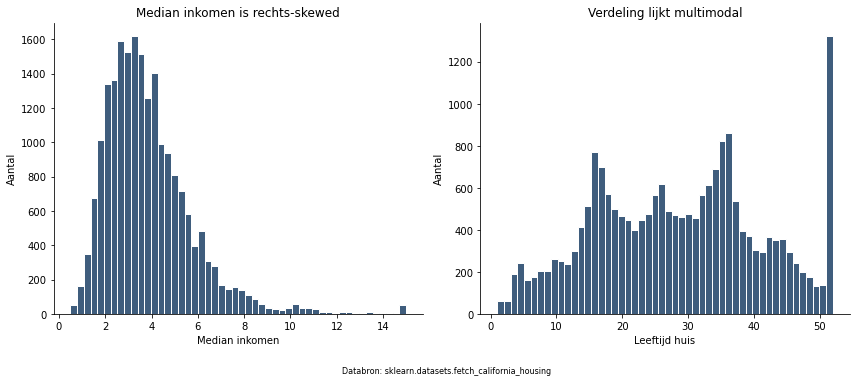

In [55]:
# Definieer grafiek ruimte
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

########################################################## Plot 1  ##########################################################

ax0.hist(df["MedInc"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en (sub)plot title
ax0.set(xlabel='Median inkomen', ylabel='Aantal', title='Median inkomen is rechts-skewed')

# verwijder de spines
ax0.spines["top"].set_visible(False)  
ax0.spines["right"].set_visible(False)

########################################################## Plot 2  ##########################################################

ax1.hist(df["HouseAge"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en subplot title voor de tweede Axes object
ax1.set(xlabel='Leeftijd huis', ylabel='Aantal', title='Verdeling lijkt multimodal')

# verwijder de subplot spines 
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)

# tight_layout() zorgt o.a. ervoor dat de plots binnen de figure blijven
fig.tight_layout()

# meld altijd je databron
fig.text(0.40, -0.05, "Databron: sklearn.datasets.fetch_california_housing", fontsize=8)

# Plot de grafiek
plt.show()

Hier is het denk proces:

- Stap 1: met`.subplots(nrows=1, ncols=2)` heb ik een grid van 1*2 aangemaakt waar twee `Axes` objecten zijn aan toegekend.
- Stap 2: vervolgens maak ik gebruik van .hist() methode van ax0 om een plot te maken en vervolgens gebruik ik verschillende methoden van de ax0 om de plot te customizen. Voor de tweede plot geldt hetzelfde redenatie.
- Stap 3: als laatste gebruik ik fig methoden om de grafiek verder op te maken.

Maar wat als we meer nadruk willen liggen op een plot door het groter te maken dan andere plots? Dit is waar we `GridSpec` module van Matplotlib goed kunnen gebruiken. `GridSpec` maakt ook een grid van de `Figure` object net als `.subplots()` maar wat maakt het anders is dat de eindgebruiker kan bepalen hoeveel grids wil hij/zij toekenen aan een `Axes` object.

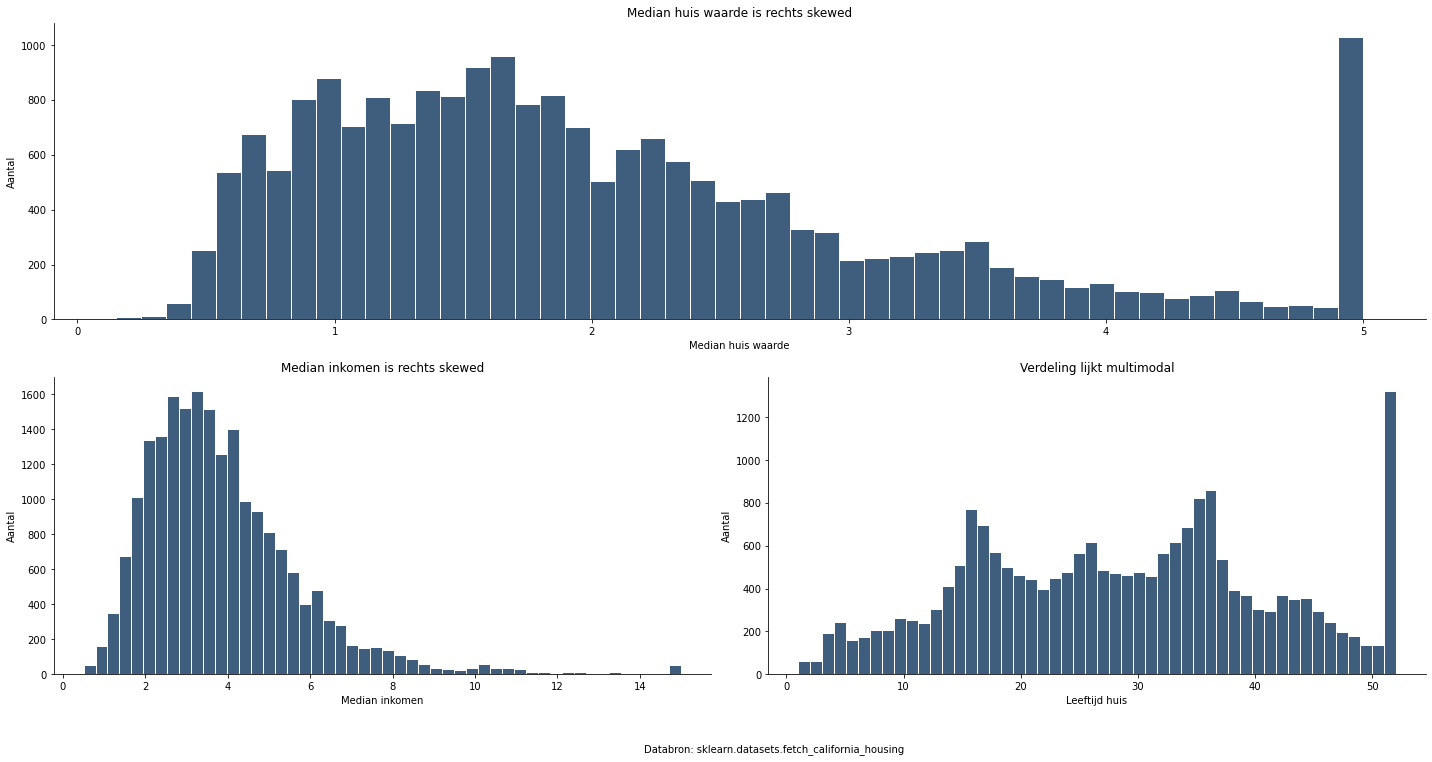

In [57]:
# Definieer grafiek ruimte met .figure() en gridspec.GridSpec() methoden.
fig = plt.figure(figsize=(20,10))
# Met GridSpec creer ik een grid van 2*2 binnen de fig object.
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

########################################################## Plot 1  ##########################################################

axs0 = fig.add_subplot(spec[0, :])
axs0.hist(df["MedHouseVal"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en subplot title voor de tweede Axes object.
axs0.set(xlabel='Median huis waarde', ylabel='Aantal', title='Median huis waarde is rechts skewed')

# verwijder de subplot spines 
axs0.spines["top"].set_visible(False)  
axs0.spines["right"].set_visible(False)

########################################################## Plot 2  ##########################################################

axs1 = fig.add_subplot(spec[1, 0])
axs1.hist(df["MedInc"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en (sub)plot title
axs1.set(xlabel='Median inkomen', ylabel='Aantal', title='Median inkomen is rechts skewed')

# verwijder de spines
axs1.spines["top"].set_visible(False)  
axs1.spines["right"].set_visible(False)

########################################################## Plot 3  ##########################################################

axs1 = fig.add_subplot(spec[1, 1])
axs1.hist(df["HouseAge"], bins=50, color="#3F5D7D", edgecolor="white")

# As-labels en subplot title voor de tweede Axes object
axs1.set(xlabel='Leeftijd huis', ylabel='Aantal', title='Verdeling lijkt multimodal')

# verwijder de subplot spines 
axs1.spines["top"].set_visible(False)  
axs1.spines["right"].set_visible(False)

# tight_layout() zorgt o.a. ervoor dat de plots binnen de figure blijven
fig.tight_layout()

# meld altijd je databron
fig.text(0.45, -0.05, "Databron: sklearn.datasets.fetch_california_housing", fontsize=10)

# Plot de grafiek
plt.show()

Hier is het denk proces:

- Stap 1: Eerst maak ik een `Figure`(fig) object aan met `plt.figure()`.
- Stap 2: Vervolgens gebruik ik `gridspec.GridSpec()` om de `Figure` object op te splitsen in een grid van 2*2. 
- Stap 3: Met `fig.add_subplot(spec[0, :])` geef ik aan dat mijn eerste plot op de bovenste twee elementen van grids komt.
- Stap 4: Met `fig.add_subplot(spec[1, 0])` en `fig.add_subplot(spec[1, 1])` geef ik aan dat mijn tweede en derde plot op de onderste twee elementen van de grid komt.

Samenvattend met `Figure`, `Axes` en `.subplots()` kunnen we grafieken structureren en customizen en `gridspec` module geeft de mogelijkheid voor een optimalisatieslag.

  
### *Seaborn*

Seaborn is een pyhton library gebouwd op Matlpotlib met een sterke integratie met pandas. Seaborn heeft twee type plot functies namelijk figure-level functies en axes-level functies. Axes-level functies retourneren matplotlib objecten. Hier kan men gebruik maken van matplotlib functionaliteiten om de plots naar eigen smaak op te maken(zie boven). Figure-level functies retourneren seaborn objecten. Voor deze plots heb je meer synatx nodig om de opmaak te customizen. 

Verder er zit een hierarchie in de plot functies van seaborn dat is figure-level functies maken gebruik van axes-level functies om grafieken te maken. Het is goed om een voorbeeld te geven. Bijvoorbeeld `relplot(...., kind="", .....)` is een figure-level function die men kan gebruiken om relatie tussen variabelen te onderzoeken. Parameter `kind` duid aan welke type relatie wil men onderzoeken namelijk `scatter` of `line`. Onder de motorkap maakt `relplot()` gebruik van de axes-level functie bijvoorbeeld `scatterplot()` om de relatie tussen twee variabelen te plotten. Hieronder vind je een overzicht van de hierarchie binnen seaborn plot functies. 

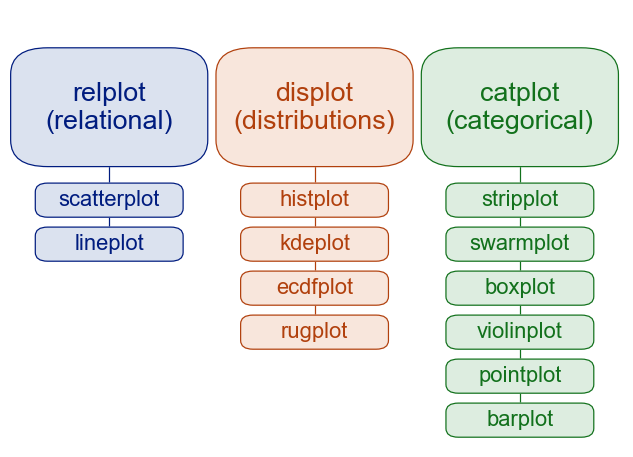

In [62]:
display.Image("./seaborn_hierarchy.png")

Laten we displot() als figure-level en histplot() als axes-level functies als voorbelden nemen om de vershil te demonstereren.

object type: <class 'seaborn.axisgrid.FacetGrid'>


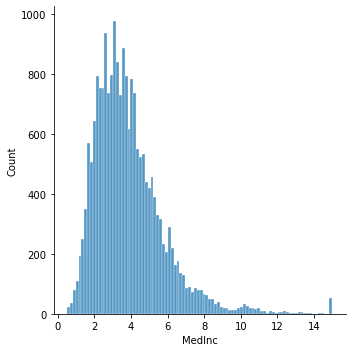

In [58]:
figure_level = sns.displot(data=df, x='MedInc', kind='hist', edgecolor="w")
print(f'object type: {type(figure_level)}')

object type: <class 'matplotlib.axes._subplots.AxesSubplot'>


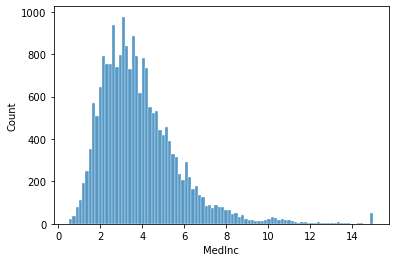

In [59]:
axes_level = sns.histplot(data=df, x='MedInc', edgecolor="w")
print(f'object type: {type(axes_level)}')

Wat anders is aan de grafieken is de layout en het type object dat geretorneerd wordt. De vraag is nu wat is de nut van een figure-level functie? Wat als men direkt axes-level functie aanroepen om een plot te maken? Het antwoord is dat figure-level functies geven de mogelijkheid om meerdere plots in een figure te plotten met minimale inzet. Het is makkelijker om dit te illustereren met een voorbeeld.

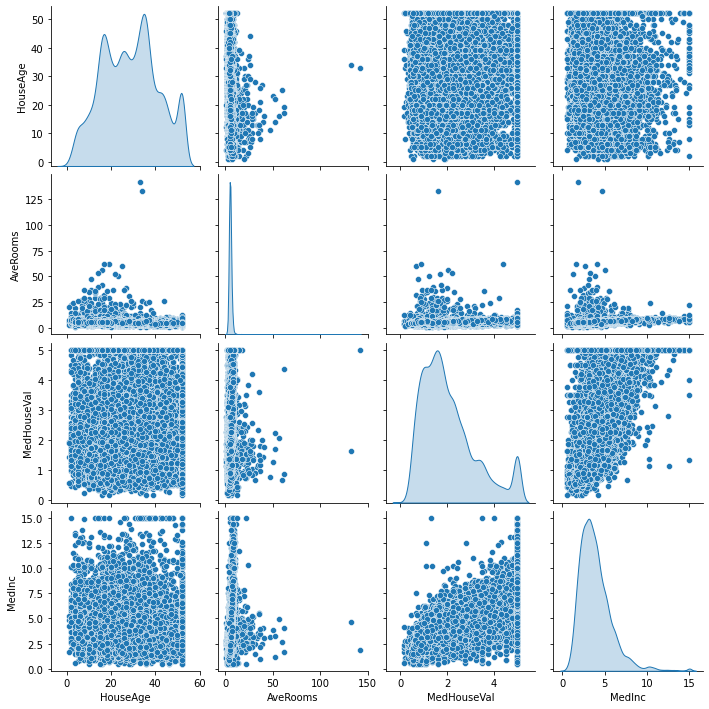

In [61]:
g = sns.pairplot(data=df[["HouseAge", "AveRooms", "MedHouseVal", "MedInc"]], kind="scatter", diag_kind="kde")

Wat hier gebeurd is dat pairplot() neemt controle over de figure en maakt er een grid  waar subplots worden geplot met 1 regel code. Produceren van zo'n plot met Matplotlib zou veel meer syntax nodig hebben. Hier zien we ook de sterke integratie met pandas in de zin van we geven een pandas dataframe als argument en seaborn maakt gebruik van de dataframe structuur om de plotten. 

### *Conclusie*

In deze blog heb ik weergegeven hoe je met Matplotlib je plots kan organiseren en customizen. Echter/Niettemin/Maar er zijn meerdere maniern binnen Matplotlib om dit te realiseren. Persoonelijk vind ik Matplotlib syntax-heavy maar desondanks omdat andere data science python libraries op Matplotlib zijn gebouwd is het investeren en mooite waard om Matplotlib in de basis te snappen.

### *Referenties*

- [Effectivly using Matplotlib](https://pbpython.com/effective-matplotlib.html)
- [Seaborn: statistical data visualization](https://joss.theoj.org/papers/10.21105/joss.03021)
- [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)
- [Plot Organization in matplotlib — Your One-stop Guide](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801)

---